In [18]:
library(readxl)
library(IRdisplay)
library(magrittr)
library(tidyverse)
library(scales)
library(gridExtra)
#library(forecast)
library(ggthemes)
theme_set(theme_economist())

source("sim_random_walk_function.R")
source("compare_models_function.R")
source("sim_stationary_example_function.R")

print("Loading is completed")

[1] "Loading is completed"


## Time Series Data Overview

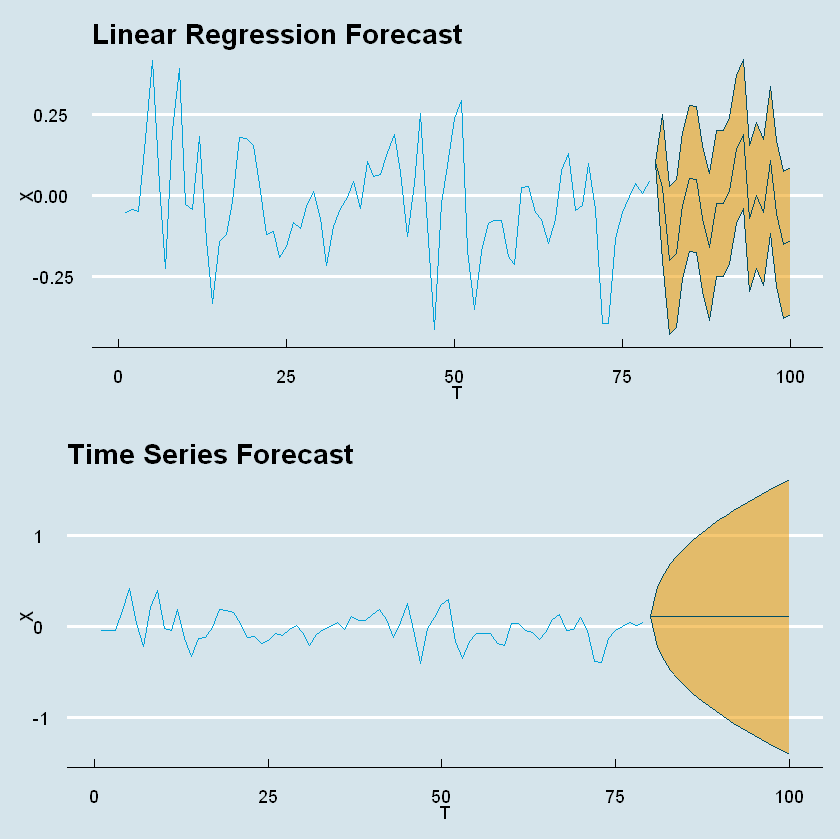

In [19]:
compare.models(n=100)

In [16]:
df <- read.csv("Mass Monthly Unemployment Rate.csv")
head(df)

,DATE,MAURN
,<chr>,<dbl>
1,1976-01-01,11.6
2,1976-02-01,11.3
3,1976-03-01,10.9
4,1976-04-01,9.9
5,1976-05-01,9.4
6,1976-06-01,9.8


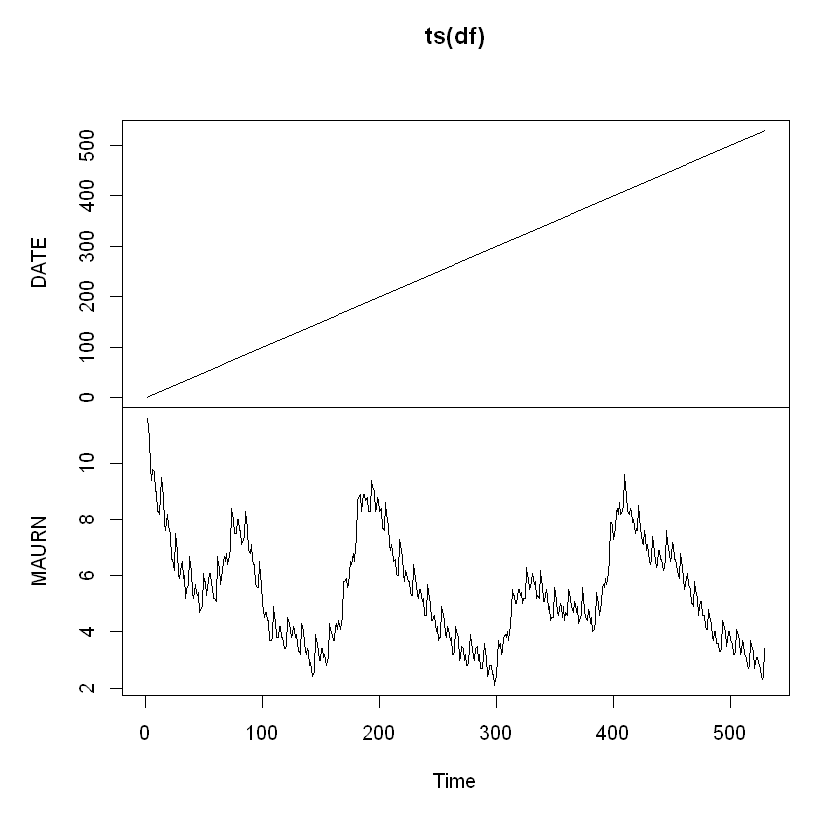

In [4]:
plot(ts(df))